# Pulling and cleaning the state minimum wage data

CNMI is Mariana Islands

In [1]:
# Load packages
import requests
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Scrape state minimum wage data and save to a data frame
url = 'https://www.dol.gov/agencies/whd/mw-consolidated'
html = requests.get(url).content
df_list = pd.read_html(html)
original = df_list[0]
print(original)

        Greater than federal MW Equals federal MW of $7.25 No MW Required
0                     AK $10.85                       CNMI             AL
1                     AR $11.00                         GA             LA
2                     AZ $13.85                         IA             MS
3                     CA $15.50                         ID             SC
4                     CO $13.65                         IN             TN
5                     CT $14.00                         KS            NaN
6                     DC $16.50                         KY            NaN
7                     DE $11.75                         NC            NaN
8                     FL $11.00                         ND            NaN
9                     HI $12.00                         NH            NaN
10                    IL $13.00                         OK            NaN
11                    MA $15.00                         PA            NaN
12                    MD $13.25       

In [2]:
# Rename column headers
original.columns = ['state_specific', 'federal', 'none']
original.head()

,state_specific,federal,none
0,AK $10.85,CNMI,AL
1,AR $11.00,GA,LA
2,AZ $13.85,IA,MS
3,CA $15.50,ID,SC
4,CO $13.65,IN,TN


In [3]:
# Split first column into two new columns
original[['state', 'specific']] = original.state_specific.str.split("$", expand = True)

# Move state to first column
original = original[['state', 'specific', 'federal', 'none']]

# Drop the last row that had the subtotals
original = original[:-1]

print(original)

   state    specific federal none
0    AK        10.85    CNMI   AL
1    AR        11.00      GA   LA
2    AZ        13.85      IA   MS
3    CA        15.50      ID   SC
4    CO        13.65      IN   TN
5    CT        14.00      KS  NaN
6    DC        16.50      KY  NaN
7    DE        11.75      NC  NaN
8    FL        11.00      ND  NaN
9    HI        12.00      NH  NaN
10   IL        13.00      OK  NaN
11   MA        15.00      PA  NaN
12   MD        13.25      TX  NaN
13   ME        13.80      UT  NaN
14   MI        10.10      WI  NaN
15   MN        10.59      WY  NaN
16   MO        12.00     NaN  NaN
17   MT         9.95     NaN  NaN
18   NE        10.50     NaN  NaN
19   NJ        14.13     NaN  NaN
20   NM        12.00     NaN  NaN
21   NV   10.50/9.50     NaN  NaN
22   NY        14.20     NaN  NaN
23   OH        10.10     NaN  NaN
24   OR        13.50     NaN  NaN
25   PR         8.50     NaN  NaN
26   RI        13.00     NaN  NaN
27   SD        10.80     NaN  NaN
28   VA       

In [4]:
# Create three data frames to later append to each other

# Create data frame with states with state-specific mws
df1 = original[['state','specific']]
df1.columns = ['state','wage']

# Create data frame with states with federal mws
df2 = original[['federal']]
df2.columns = ['state']
df2['wage'] = '7.25'

# Create data frame with states with no mws
df3 = original[['none']]
df3.columns = ['state']
df3['wage'] = '7.25'

/var/folders/xc/1yxv29253_19pst1hxznjt8m0000gn/T/ipykernel_83432/981066343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wage'] = '7.25'
/var/folders/xc/1yxv29253_19pst1hxznjt8m0000gn/T/ipykernel_83432/981066343.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['wage'] = '7.25'


In [5]:
# Append the data frames into one 
df = pd.concat([df1, df2, df3])
df = df.dropna()

# Sort data alphabetially by state
df.sort_values('state', inplace=True, ascending=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print(df)

   state        wage
0    AK        10.85
1     AL        7.25
2    AR        11.00
3    AZ        13.85
4    CA        15.50
5   CNMI        7.25
6    CO        13.65
7    CT        14.00
8    DC        16.50
9    DE        11.75
10   FL        11.00
11    GA        7.25
12   GU         9.25
13   HI        12.00
14    IA        7.25
15    ID        7.25
16   IL        13.00
17    IN        7.25
18    KS        7.25
19    KY        7.25
20    LA        7.25
21   MA        15.00
22   MD        13.25
23   ME        13.80
24   MI        10.10
25   MN        10.59
26   MO        12.00
27    MS        7.25
28   MT         9.95
29    NC        7.25
30    ND        7.25
31   NE        10.50
32    NH        7.25
33   NJ        14.13
34   NM        12.00
35   NV   10.50/9.50
36   NY        14.20
37   OH        10.10
38    OK        7.25
39   OR        13.50
40    PA        7.25
41   PR         8.50
42   RI        13.00
43    SC        7.25
44   SD        10.80
45    TN        7.25
46    TX     

In [6]:
# Reassign NV minimum wage as the higher of the two for simplicity
df.wage[df.wage=='10.50/9.50'] = '10.50'

print(df)

   state   wage
0    AK   10.85
1     AL   7.25
2    AR   11.00
3    AZ   13.85
4    CA   15.50
5   CNMI   7.25
6    CO   13.65
7    CT   14.00
8    DC   16.50
9    DE   11.75
10   FL   11.00
11    GA   7.25
12   GU    9.25
13   HI   12.00
14    IA   7.25
15    ID   7.25
16   IL   13.00
17    IN   7.25
18    KS   7.25
19    KY   7.25
20    LA   7.25
21   MA   15.00
22   MD   13.25
23   ME   13.80
24   MI   10.10
25   MN   10.59
26   MO   12.00
27    MS   7.25
28   MT    9.95
29    NC   7.25
30    ND   7.25
31   NE   10.50
32    NH   7.25
33   NJ   14.13
34   NM   12.00
35   NV   10.50
36   NY   14.20
37   OH   10.10
38    OK   7.25
39   OR   13.50
40    PA   7.25
41   PR    8.50
42   RI   13.00
43    SC   7.25
44   SD   10.80
45    TN   7.25
46    TX   7.25
47    UT   7.25
48   VA   12.00
49   VI   10.50
50   VT   13.18
51   WA   15.74
52    WI   7.25
53   WV    8.75
54    WY   7.25


In [7]:
# Recast the wage column as float data type for easy numeric analysis
df['wage'] = df['wage'].astype(float)

df.dtypes

state     object
wage     float64
dtype: object

In [8]:
# get basic descriptives for wages
df.describe()

,wage
count,55.000000
mean,10.303455
std,2.906961
min,7.250000
25%,7.250000
50%,10.500000
75%,13.000000
max,16.500000


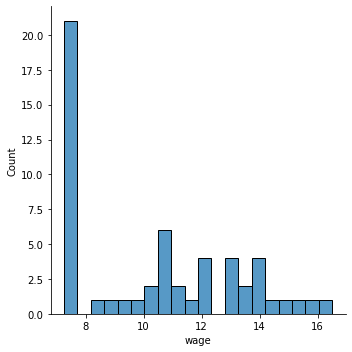

In [14]:
import seaborn as sns 

sns.displot(df, x = df['wage'], bins=20)

# Add in BBCE SNAP data

Now let's scrape the BBCE table from USDA for information about the state BBCE policies. 

I want to see if there is a correlation between states using BBCE and those with modified mi